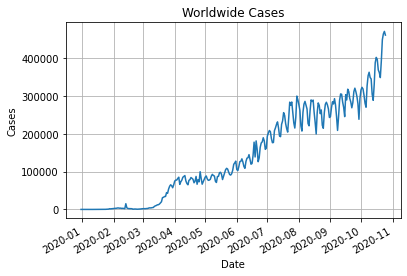

Total cases: 42758015


In [74]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 

# Read the dataset
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

# Delete useless columns
data = data.drop(
    columns=[
             'day',
             'month',
             'year',
             'geoId',
             'continentExp',
             'countryterritoryCode',
             'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
             'popData2019'
             ]
    )

# Rename columns
data.rename(
    columns={
        'countriesAndTerritories': 'country',
        'dateRep': 'date'
        }, inplace=True)

# Reverse the data (Plots are showed in a better way)
data = data.reindex(index=data.index[::-1])

# Get all unique dates
dates = data.date.unique()

# Create final dataset
final_data = pd.DataFrame(columns=['date', 'cases'])

# Fill new dataset with worldwide data 
for date in dates:
  cases = 0
  new_data = data[data['date'].str.contains(date)]
  cases += new_data.cases.sum()
  final_data = final_data.append({'date': date, 'cases': cases}, ignore_index=True)

# Beutify dates
final_data.date = pd.to_datetime(final_data['date'], format='%d/%m/%Y')

# Sort dataset by date
final_data = final_data.sort_values(by=['date'])

# Create plot
fig, ax = plt.subplots()
ax.plot(final_data['date'], final_data['cases'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set labels
ax.set(xlabel='Date', ylabel='Cases', title='Worldwide Cases')

# Show plots
fig.autofmt_xdate()
ax.grid()
plt.show()

# Print total dates
total_cases = str(final_data.cases.sum())
print("Total cases: " + total_cases)
